## Problem Statement
You are provided with a dataset containing various attributes of different wine samples. The goal of this assignment is to perform cluster analysis using the K-means algorithm to identify natural groupings in the data based on the attributes provided.

## Dataset Overview
The dataset consists of the following columns:
1. **Alcohol**: Alcohol content in the wine sample.
2. **Malic_Acid**: Amount of malic acid in the wine.
3. **Ash**: Ash content in the wine.
4. **Ash_Alcalinity**: Alkalinity of ash in the wine.
5. **Magnesium**: Magnesium content in the wine.
6. **Total_Phenols**: Total phenols content in the wine.
7. **Flavanoids**: Flavonoid content in the wine.
8. **Nonflavanoid_Phenols**: Non-flavonoid phenol content in the wine.
9. **Proanthocyanins**: Proanthocyanin content in the wine.
10. **Color_Intensity**: Intensity of the color of the wine.
11. **Hue**: Hue of the wine.
12. **OD280**: Ratio of OD280/OD315 of diluted wines.
13. **Proline**: Proline content in the wine.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('WineData.csv')
df.head()

Unnamed: 0  Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  \
0           0    14.23        1.71  2.43          15.6        127   
1           1    13.20        1.78  2.14          11.2        100   
2           2    13.16        2.36  2.67          18.6        101   
3           3    14.37        1.95  2.50          16.8        113   
4           4    13.24        2.59  2.87          21.0        118   

   Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_Intensity   Hue  OD280  Proline  
0             5.64  1.04   3.92     1065  
1             4.38  1.05   3.40     1050  
2             5.68  1.03   3.17     1185  
3             7.80  0.86   3.45     1480  
4             4.32  1.04   2.93      735

In [3]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

## Tasks

### Task 1: Data Preprocessing
- Handle any missing values if present.
- Scale the data using `StandardScaler` or `MinMaxScaler` since K-means is sensitive to the scale of features.
- Remove any unnecessary columns that don't contribute to clustering (e.g., index column if not relevant).

In [4]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


### Task 2: Determine the Optimal Number of Clusters
- Use the **Elbow method** to determine the optimal number of clusters.
- Visualize the results using a line plot of the **Within-Cluster Sum of Squares (WCSS)** against the number of clusters.



E:\Users\UseR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Users\UseR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Users\UseR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Users\UseR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

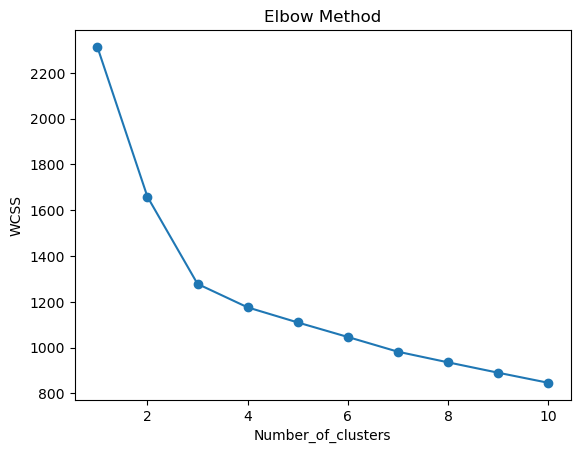

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
Number_of_cluster=range(1,11)
for i in Number_of_cluster:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss ,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number_of_clusters')
plt.ylabel('WCSS')
plt.show()


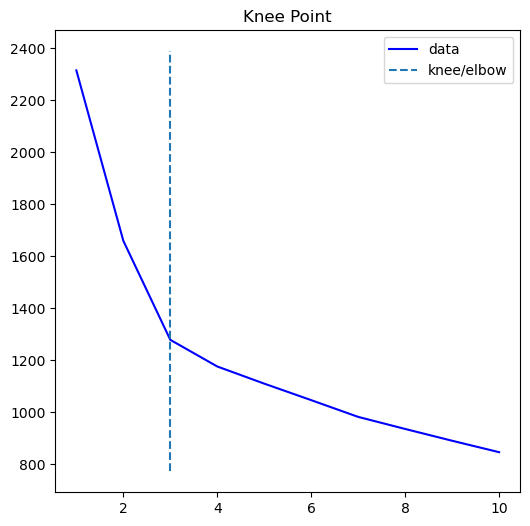

In [7]:
from kneed import KneeLocator

kn= KneeLocator(Number_of_cluster, wcss, direction='decreasing', curve='convex')
kn.plot_knee()

### Task 3: K-means Clustering
- Apply K-means clustering using the optimal number of clusters obtained from the Elbow method.
- Assign cluster labels to each data point and create a new column in the dataset with these labels.



In [8]:
optimal_clusters = 3  
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)
df['Cluster'] = cluster_labels


E:\Users\UseR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Task 4: Cluster Analysis
- Analyze the clusters by comparing the mean values of each feature within each cluster.
- Visualize the clusters using a pairplot or scatterplot for selected features to understand the separations visually.



In [9]:
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)


           Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
Cluster                                                              
0        12.250923    1.897385  2.231231     20.063077   92.738462   
1        13.134118    3.307255  2.417647     21.241176   98.666667   
2        13.676774    1.997903  2.466290     17.462903  107.967742   

         Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
Cluster                                                                     
0             2.247692    2.050000              0.357692         1.624154   
1             1.683922    0.818824              0.451961         1.145882   
2             2.847581    3.003226              0.292097         1.922097   

         Color_Intensity       Hue     OD280      Proline  
Cluster                                                    
0               2.973077  1.062708  2.803385   510.169231  
1               7.234706  0.691961  1.696667   619.058824  
2               5.45354

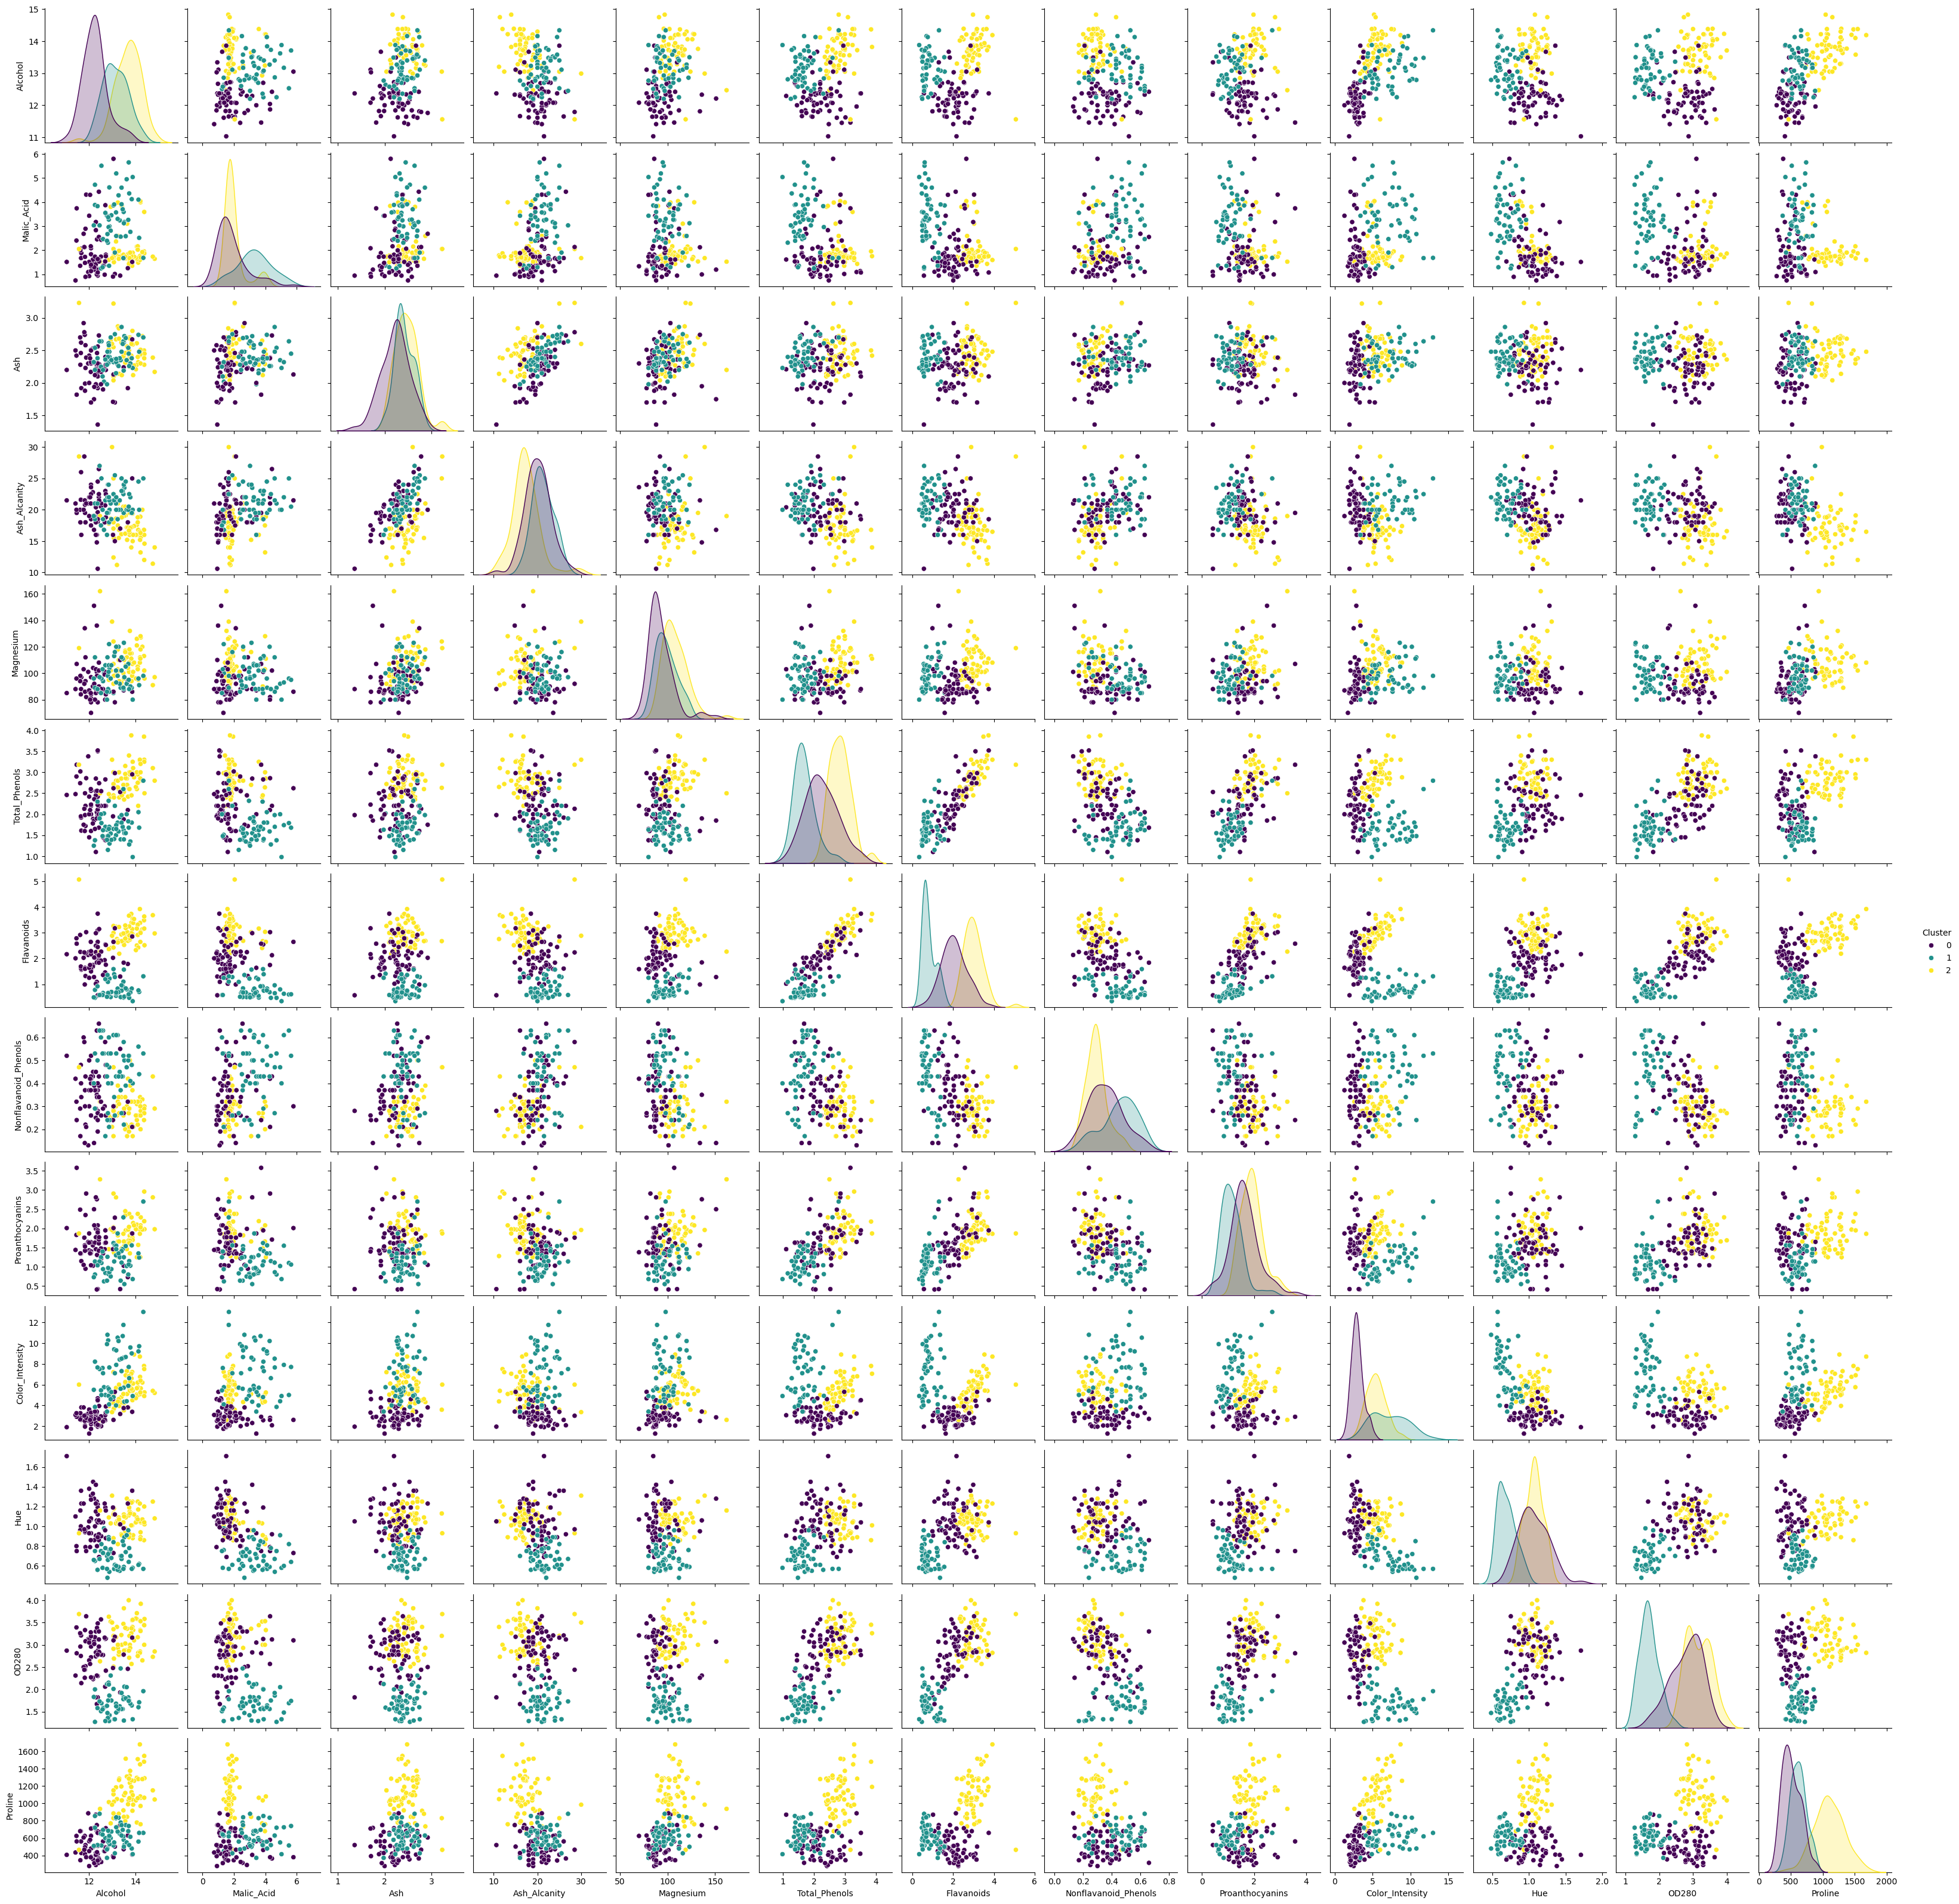

In [10]:
import seaborn as sns

sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()


### Task 5: Interpretation
- Interpret the characteristics of each cluster. For example, identify which cluster has the highest alcohol content, or which has the most intense color, etc.
- Suggest potential names or categories for each cluster based on the observed characteristics.


In [11]:
for cluster in range(optimal_clusters):
    print(f"Cluster {cluster} characteristics:")
    print(df[df['Cluster'] == cluster].describe())


Cluster 0 characteristics:
         Alcohol  Malic_Acid        Ash  Ash_Alcanity   Magnesium  \
count  65.000000   65.000000  65.000000     65.000000   65.000000   
mean   12.250923    1.897385   2.231231     20.063077   92.738462   
std     0.533010    1.012253   0.299199      3.019446   13.680822   
min    11.030000    0.740000   1.360000     10.600000   70.000000   
25%    11.870000    1.210000   2.000000     18.000000   86.000000   
50%    12.250000    1.610000   2.240000     20.000000   88.000000   
75%    12.420000    2.130000   2.420000     21.600000   98.000000   
max    13.860000    5.800000   2.920000     28.500000  151.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count      65.000000   65.000000             65.000000        65.000000   
mean        2.247692    2.050000              0.357692         1.624154   
std         0.530291    0.608949              0.121434         0.570397   
min         1.100000    0.570000              0.130

In [15]:
# Example interpretation
cluster_names = {
    0:'Moderate Color Intensity',
    1: 'Low Total_Phenols',
    2: 'High Alcohol Content'
}
df['Cluster_Name'] = df['Cluster'].map(cluster_names)

df[['Alcohol','Color_Intensity','Total_Phenols','Cluster_Name']]



Alcohol  Color_Intensity  Total_Phenols          Cluster_Name
0      14.23             5.64           2.80  High Alcohol Content
1      13.20             4.38           2.65  High Alcohol Content
2      13.16             5.68           2.80  High Alcohol Content
3      14.37             7.80           3.85  High Alcohol Content
4      13.24             4.32           2.80  High Alcohol Content
..       ...              ...            ...                   ...
173    13.71             7.70           1.68     Low Total_Phenols
174    13.40             7.30           1.80     Low Total_Phenols
175    13.27            10.20           1.59     Low Total_Phenols
176    13.17             9.30           1.65     Low Total_Phenols
177    14.13             9.20           2.05     Low Total_Phenols

[178 rows x 4 columns]

# Best of Luck